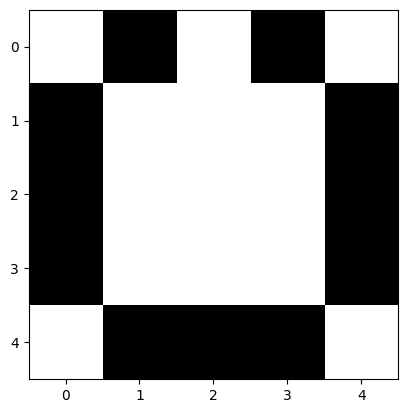

In [94]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sprite():
    sprite = np.ones((5, 5))

    left_half = np.random.randint(0, 2, (5, 3))
    sprite[:, :3] = left_half

    right_half = np.fliplr(left_half)
    sprite[:, 2:] = right_half

    return sprite

sprite = generate_sprite()

plt.imshow(sprite, cmap='gray', interpolation='nearest')
plt.show()


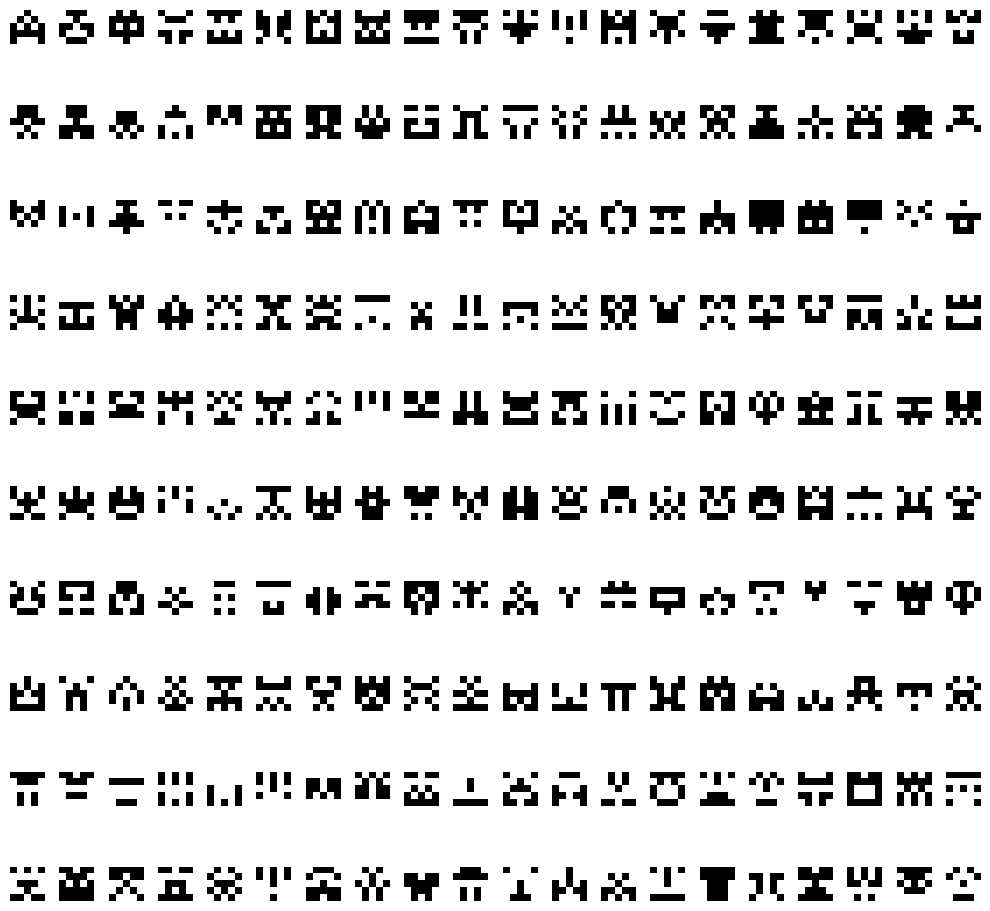

In [95]:
def generate_sprite_map(num_rows, num_columns):
    sprite_map = []
    for _ in range(num_rows):
        row = []
        for _ in range(num_columns):
            sprite = generate_sprite()
            row.append(sprite)
        sprite_map.append(row)
    return sprite_map

sprite_map = generate_sprite_map(10, 20)

fig, axes = plt.subplots(nrows=10, ncols=20, figsize=(10, 10))
for i in range(10):
    for j in range(20):
        axes[i, j].imshow(sprite_map[i][j], cmap='binary', interpolation='nearest')
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()


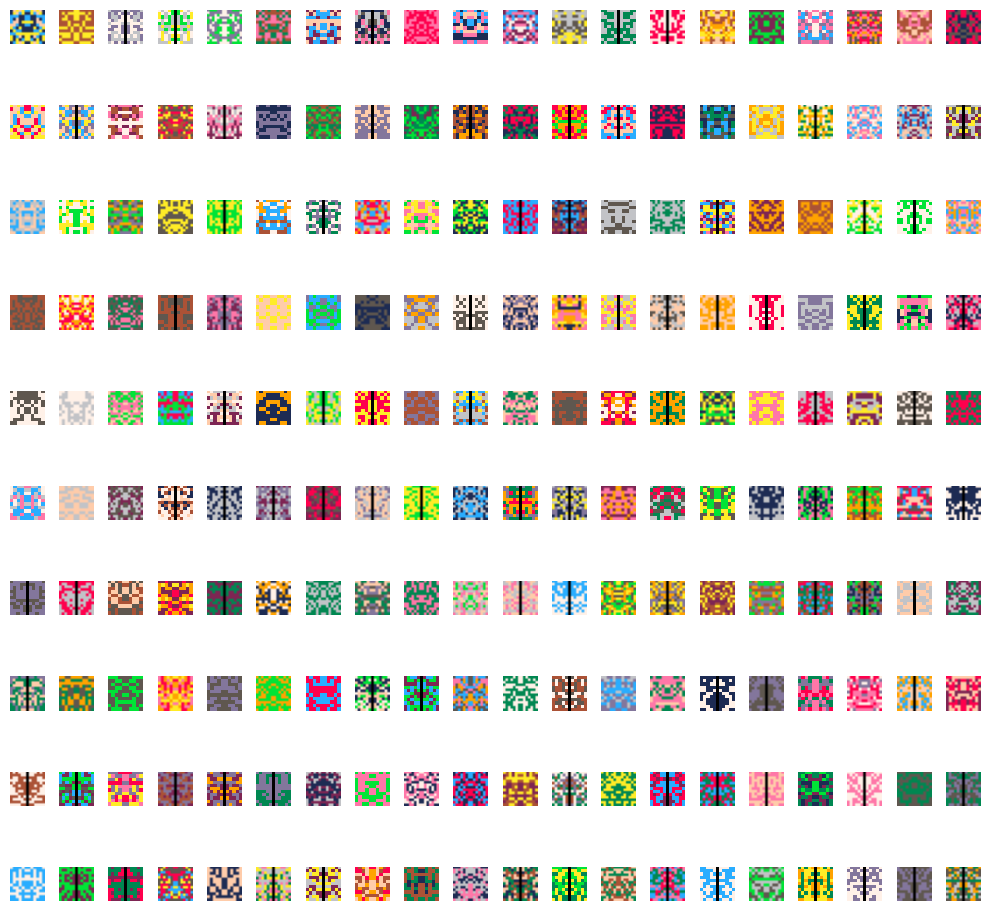

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Палитра из PICO-8
palette = [
    "#1D2B53", "#7E2553", "#008751", "#AB5236",
    "#5F574F", "#C2C3C7", "#FFF1E8", "#FF004D",
    "#FFA300", "#FFEC27", "#00E436", "#29ADFF",
    "#83769C", "#FF77A8", "#FFCCAA"
]

def generate_sprite():
    sprite_size = np.random.randint(10, 15)  # Размер спрайта от 10 до 15

    # Создаем пустой массив спрайта
    sprite = np.ones((sprite_size, sprite_size, 3), dtype=np.uint8)

    # Генерируем несколько случайных цветов для спрайта из палитры
    num_colors = np.random.randint(2, 5)  # Количество цветов от 2 до 4
    colors = np.random.choice(palette, num_colors, replace=False)

    # Разукрашиваем спрайт случайными цветами
    for i in range(sprite_size):
        for j in range(sprite_size // 2):  # Применяем вертикальную симметрию только к левой половине спрайта
            color = colors[np.random.randint(num_colors)]
            sprite[i, j] = np.array(tuple(int(color[i:i+2], 16) for i in (1, 3, 5)))
            # Применяем вертикальную симметрию
            sprite[i, sprite_size - j - 1] = sprite[i, j]

    return sprite

def generate_sprite_map(num_rows, num_columns):
    sprite_map = []
    for _ in range(num_rows):
        row = []
        for _ in range(num_columns):
            sprite = generate_sprite()
            row.append(sprite)
        sprite_map.append(row)
    return sprite_map

# Генерируем карту спрайтов размером 10x20
sprite_map = generate_sprite_map(10, 20)

# Выводим карту спрайтов
fig, axes = plt.subplots(nrows=10, ncols=20, figsize=(10, 10))
for i in range(10):
    for j in range(20):
        axes[i, j].imshow(sprite_map[i][j])
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

System: TIBEDIED
Coordinates: (2, 90)
Economy: 2
Government Type: 1
Tech Level: 8
Population: 36
Productivity: 11520
Radius: 4610
----
System: QUBE
Coordinates: (152, 205)
Economy: 5
Government Type: 7
Tech Level: 6
Population: 37
Productivity: 16280
Radius: 5528
----
System: LELEER
Coordinates: (77, 243)
Economy: 3
Government Type: 3
Tech Level: 7
Population: 35
Productivity: 13720
Radius: 3149
----
System: BIARGE
Coordinates: (83, 208)
Economy: 0
Government Type: 2
Tech Level: 11
Population: 47
Productivity: 22560
Radius: 4435
----
System: XEQUERIN
Coordinates: (180, 131)
Economy: 3
Government Type: 4
Tech Level: 6
Population: 32
Productivity: 14336
Radius: 3508
----
System: TIRAOR
Coordinates: (172, 176)
Economy: 0
Government Type: 4
Tech Level: 9
Population: 41
Productivity: 26240
Radius: 4780
----
System: RABEDIRA
Coordinates: (69, 249)
Economy: 1
Government Type: 2
Tech Level: 8
Population: 36
Productivity: 15552
Radius: 3909
----
System: LAVE
Coordinates: (20, 173)
Economy: 5
Go

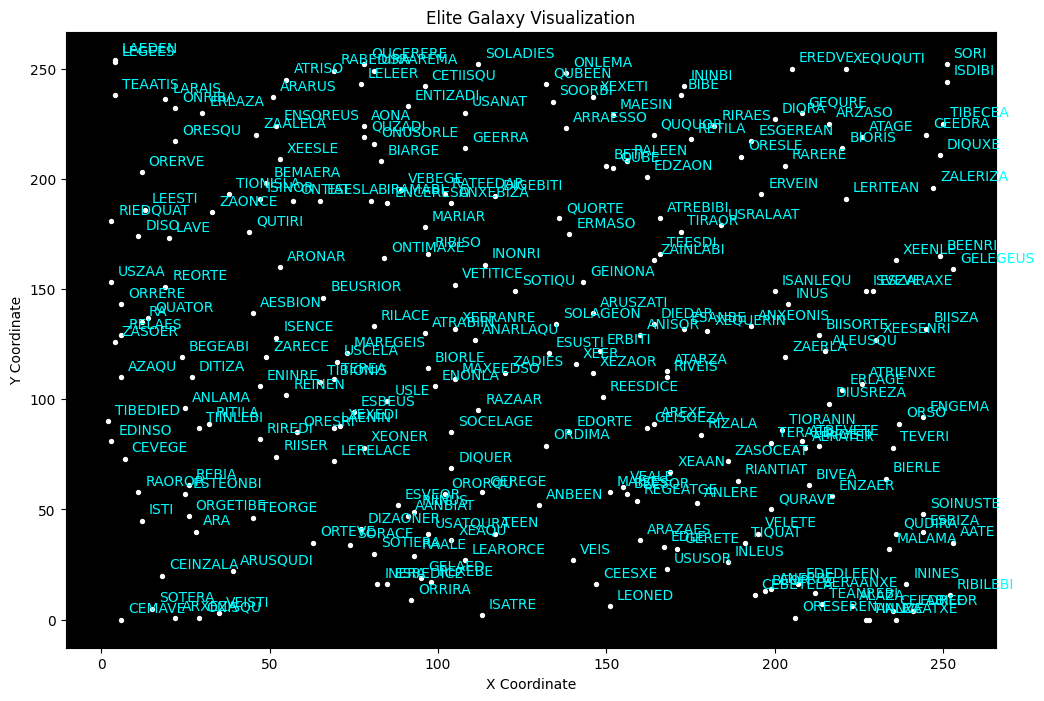

In [89]:
import random

pairs = "..LEXEGEZACEBISO" \
        "USESARMAINDIREA." \
        "ERATENBERALAVETI" \
        "EDORQUANTEISRION"  

class SeedType:
    def __init__(self, w0, w1, w2):
        self.w0 = w0
        self.w1 = w1
        self.w2 = w2

class PlanetarySystem:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.economy = 0
        self.govtype = 0
        self.techlev = 0
        self.population = 0
        self.productivity = 0
        self.radius = 0
        self.goatsoupseed = SeedType(0, 0, 0)
        self.name = ""

def tweakseed(s):
    temp = (s.w0 + s.w1 + s.w2) & 0xFFFF
    s.w0 = s.w1 & 0xFFFF
    s.w1 = s.w2 & 0xFFFF
    s.w2 = temp

def makesystem(s):
    thissys = PlanetarySystem()
    longnameflag = s.w0 & 64

    thissys.x = s.w1 >> 8
    thissys.y = s.w0 >> 8

    thissys.govtype = (s.w1 >> 3) & 7

    thissys.economy = (s.w0 >> 8) & 7
    if thissys.govtype <= 1:
        thissys.economy |= 2

    thissys.techlev = ((s.w1 >> 8) & 3) + (thissys.economy ^ 7)
    thissys.techlev += (thissys.govtype >> 1)
    if thissys.govtype & 1 == 1:
        thissys.techlev += 1

    thissys.population = 4 * thissys.techlev + thissys.economy
    thissys.population += thissys.govtype + 1

    thissys.productivity = ((thissys.economy ^ 7) + 3) * (thissys.govtype + 4)
    thissys.productivity *= thissys.population * 8

    thissys.radius = 256 * (((s.w2 >> 8) & 15) + 11) + thissys.x

    thissys.goatsoupseed.a = s.w1 & 0xFF
    thissys.goatsoupseed.b = s.w1 >> 8
    thissys.goatsoupseed.c = s.w2 & 0xFF
    thissys.goatsoupseed.d = s.w2 >> 8

    pair1 = 2 * ((s.w2 >> 8) & 31)
    tweakseed(s)
    pair2 = 2 * ((s.w2 >> 8) & 31)
    tweakseed(s)
    pair3 = 2 * ((s.w2 >> 8) & 31)
    tweakseed(s)
    pair4 = 2 * ((s.w2 >> 8) & 31)
    tweakseed(s)

    thissys.name = pairs[pair1] + pairs[pair1 + 1] + pairs[pair2] + pairs[pair2 + 1] + pairs[pair3] + pairs[pair3 + 1]

    if longnameflag:
        thissys.name += pairs[pair4] + pairs[pair4 + 1]

    thissys.name = thissys.name.replace(".", "")

    return thissys

def generate_galaxy():
    galaxy = []

    w0 = 0x5A4A
    w1 = 0x0248
    w2 = 0xB753

    seed = SeedType(w0, w1, w2)

    for _ in range(256):
        system = makesystem(seed)
        galaxy.append(system)
    
    return galaxy

galaxy = generate_galaxy()

for system in galaxy:
    print(f"System: {system.name}")
    print(f"Coordinates: ({system.x}, {system.y})")
    print(f"Economy: {system.economy}")
    print(f"Government Type: {system.govtype}")
    print(f"Tech Level: {system.techlev}")
    print(f"Population: {system.population}")
    print(f"Productivity: {system.productivity}")
    print(f"Radius: {system.radius}")
    print("----")

def visualize_galaxy(galaxy):
    x = [system.x for system in galaxy]
    y = [system.y for system in galaxy]
    names = [system.name for system in galaxy]

    plt.figure(figsize=(12, 8))
    plt.scatter(x, y, c='w', s=8)

    for i, name in enumerate(names):
        plt.annotate(name, (x[i], y[i]), xytext=(5, 5), textcoords='offset points', color="cyan")

    plt.gca().set_facecolor('black')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Elite Galaxy Visualization')
    plt.show()

galaxy = generate_galaxy()

visualize_galaxy(galaxy)